# Comparison analysis for multi-omics data of mouse ES cells with DMSO and IdU treatments

In this tutorial, we use primary mouse fibroblasts as an example to show the basic application of BurstLink to single-cell multi-omics data [[Desai RV et al., 2021](https://www.science.org/doi/10.1126/science.abc6506?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed), [Kamimoto et al., 2023](https://www.nature.com/articles/s41586-022-05688-9)].

In [1]:
# Importing packages
import os
import numpy as np
import pandas as pd
from IPython.display import Image, display
# import celloracle as co
import burstlink as bl

In [2]:
# Setting your work dictionary
os.chdir("your_path/realistic_data")

## Data preprocessing

### Preprocessing for scRNA-seq data

First, we perform basic preprocessing of scRNA-seq data for two groups, including filtering out, and data visualization [[Desai RV et al., 2021](https://www.science.org/doi/10.1126/science.abc6506?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed)].

In [ ]:
read_filename_DMSO = os.path.abspath('primary_mouse_data/raw_data/DMSO_scRNA_counts.csv')
read_filename_IdU = os.path.abspath('primary_mouse_data/raw_data/IdU_scRNA_counts.csv')
save_filename_DMSO = 'stat_matrix_ESC_DMSO.csv' 
save_filename_IdU = 'stat_matrix_ESC_idu.csv'
stat_matrix_DMSO = bl.pp._preprocessing.RNAseq_analysis_uni(read_filename_DMSO, save_filename_DMSO, False)
stat_matrix_IdU = bl.pp._preprocessing.RNAseq_analysis_uni(read_filename_IdU, save_filename_IdU, False)

### Preprocessing for scATAC-seq data

### Integration of selected base-GRN and filtered scRNA-seq data

In [ ]:
grn_filename = os.path.abspath('primary_mouse_data/raw_data/genepair_grn.csv')
rnaseq_filename = os.path.abspath('primary_mouse_data/raw_data/stat_matrix_ESC_DMSO.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/DMSO_scRNA_counts.csv')
threshold_value = 1
selected_genepair, selected_counts_matrix = bl.pp._preprocessing.selection_GRNandRNAseq(grn_filename, rnaseq_filename, counts_filename, threshold_value, verbose = True)

grn_filename = os.path.abspath('primary_mouse_data/raw_data/genepair_grn.csv')
rnaseq_filename = os.path.abspath('primary_mouse_data/raw_data/stat_matrix_ESC_idu.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/IdU_scRNA_counts.csv')
threshold_value = 1
selected_genepair, selected_counts_matrix = bl.pp._preprocessing.selection_GRNandRNAseq(grn_filename, rnaseq_filename, counts_filename, threshold_value, verbose = True)

## Genome-wide inference procedure

Inference for DMSO group:

In [ ]:
grn_filename =  os.path.abspath('primary_mouse_data/raw_data/selected_genepair_DMSO.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/selected_counts_matrix_DMSO.csv')
save_filename = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_DMSO.csv')
infer_results = bl.tools._burst_interactions.global_burst_link(grn_filename, counts_filename, save_filename, verbose1 = False, verbose2 = False, verbose3 = 0, test = False, verbose4 = True)

Inference for IdU group:

In [ ]:
grn_filename =  os.path.abspath('primary_mouse_data/raw_data/selected_genepair_idu.csv')
counts_filename = os.path.abspath('primary_mouse_data/raw_data/selected_counts_matrix_idu.csv')
save_filename = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_idu.csv')
infer_results = bl.tools._burst_interactions.global_burst_link(grn_filename, counts_filename, save_filename, verbose1 = False, verbose2 = False, verbose3 = 0, test = False, verbose4 = True)

### Inference results visualization

For DMSO group:

In [ ]:
read_filename = os.path.abspath('primary_mouse_data/inference_results/feedback_infer_results_DMSO.csv')
counts_matrix = bl._utils._plotting.network_umap_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/network_data_umap_DMSO.csv'))
gene_interactions = bl._utils._plotting.network_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/network_data_DMSO.csv'))
burst_info = bl._utils._plotting.burst_pre(read_filename, os.path.abspath('primary_mouse_data/inference_results/burst_info_DMSO.csv'))


In [ ]:
counts_file = os.path.abspath("primary_mouse_data/inference_results/network_data_umap_DMSO.csv")
gene_interactions_file = os.path.abspath("primary_mouse_data/inference_results/network_data_DMSO.csv")
burst_info_file = os.path.abspath("primary_mouse_data/inference_results/burst_info_DMSO.csv")
degree_data_file = os.path.abspath("primary_mouse_data/inference_results/degree_data_DMSO.csv")
network_figure = os.path.abspath("primary_mouse_data/inference_results/network_plot_DMSO.png") 
bl.plotting._plotting.network_visualization(counts_file, gene_interactions_file, burst_info_file, degree_data_file, network_figure, 3, 0.1)

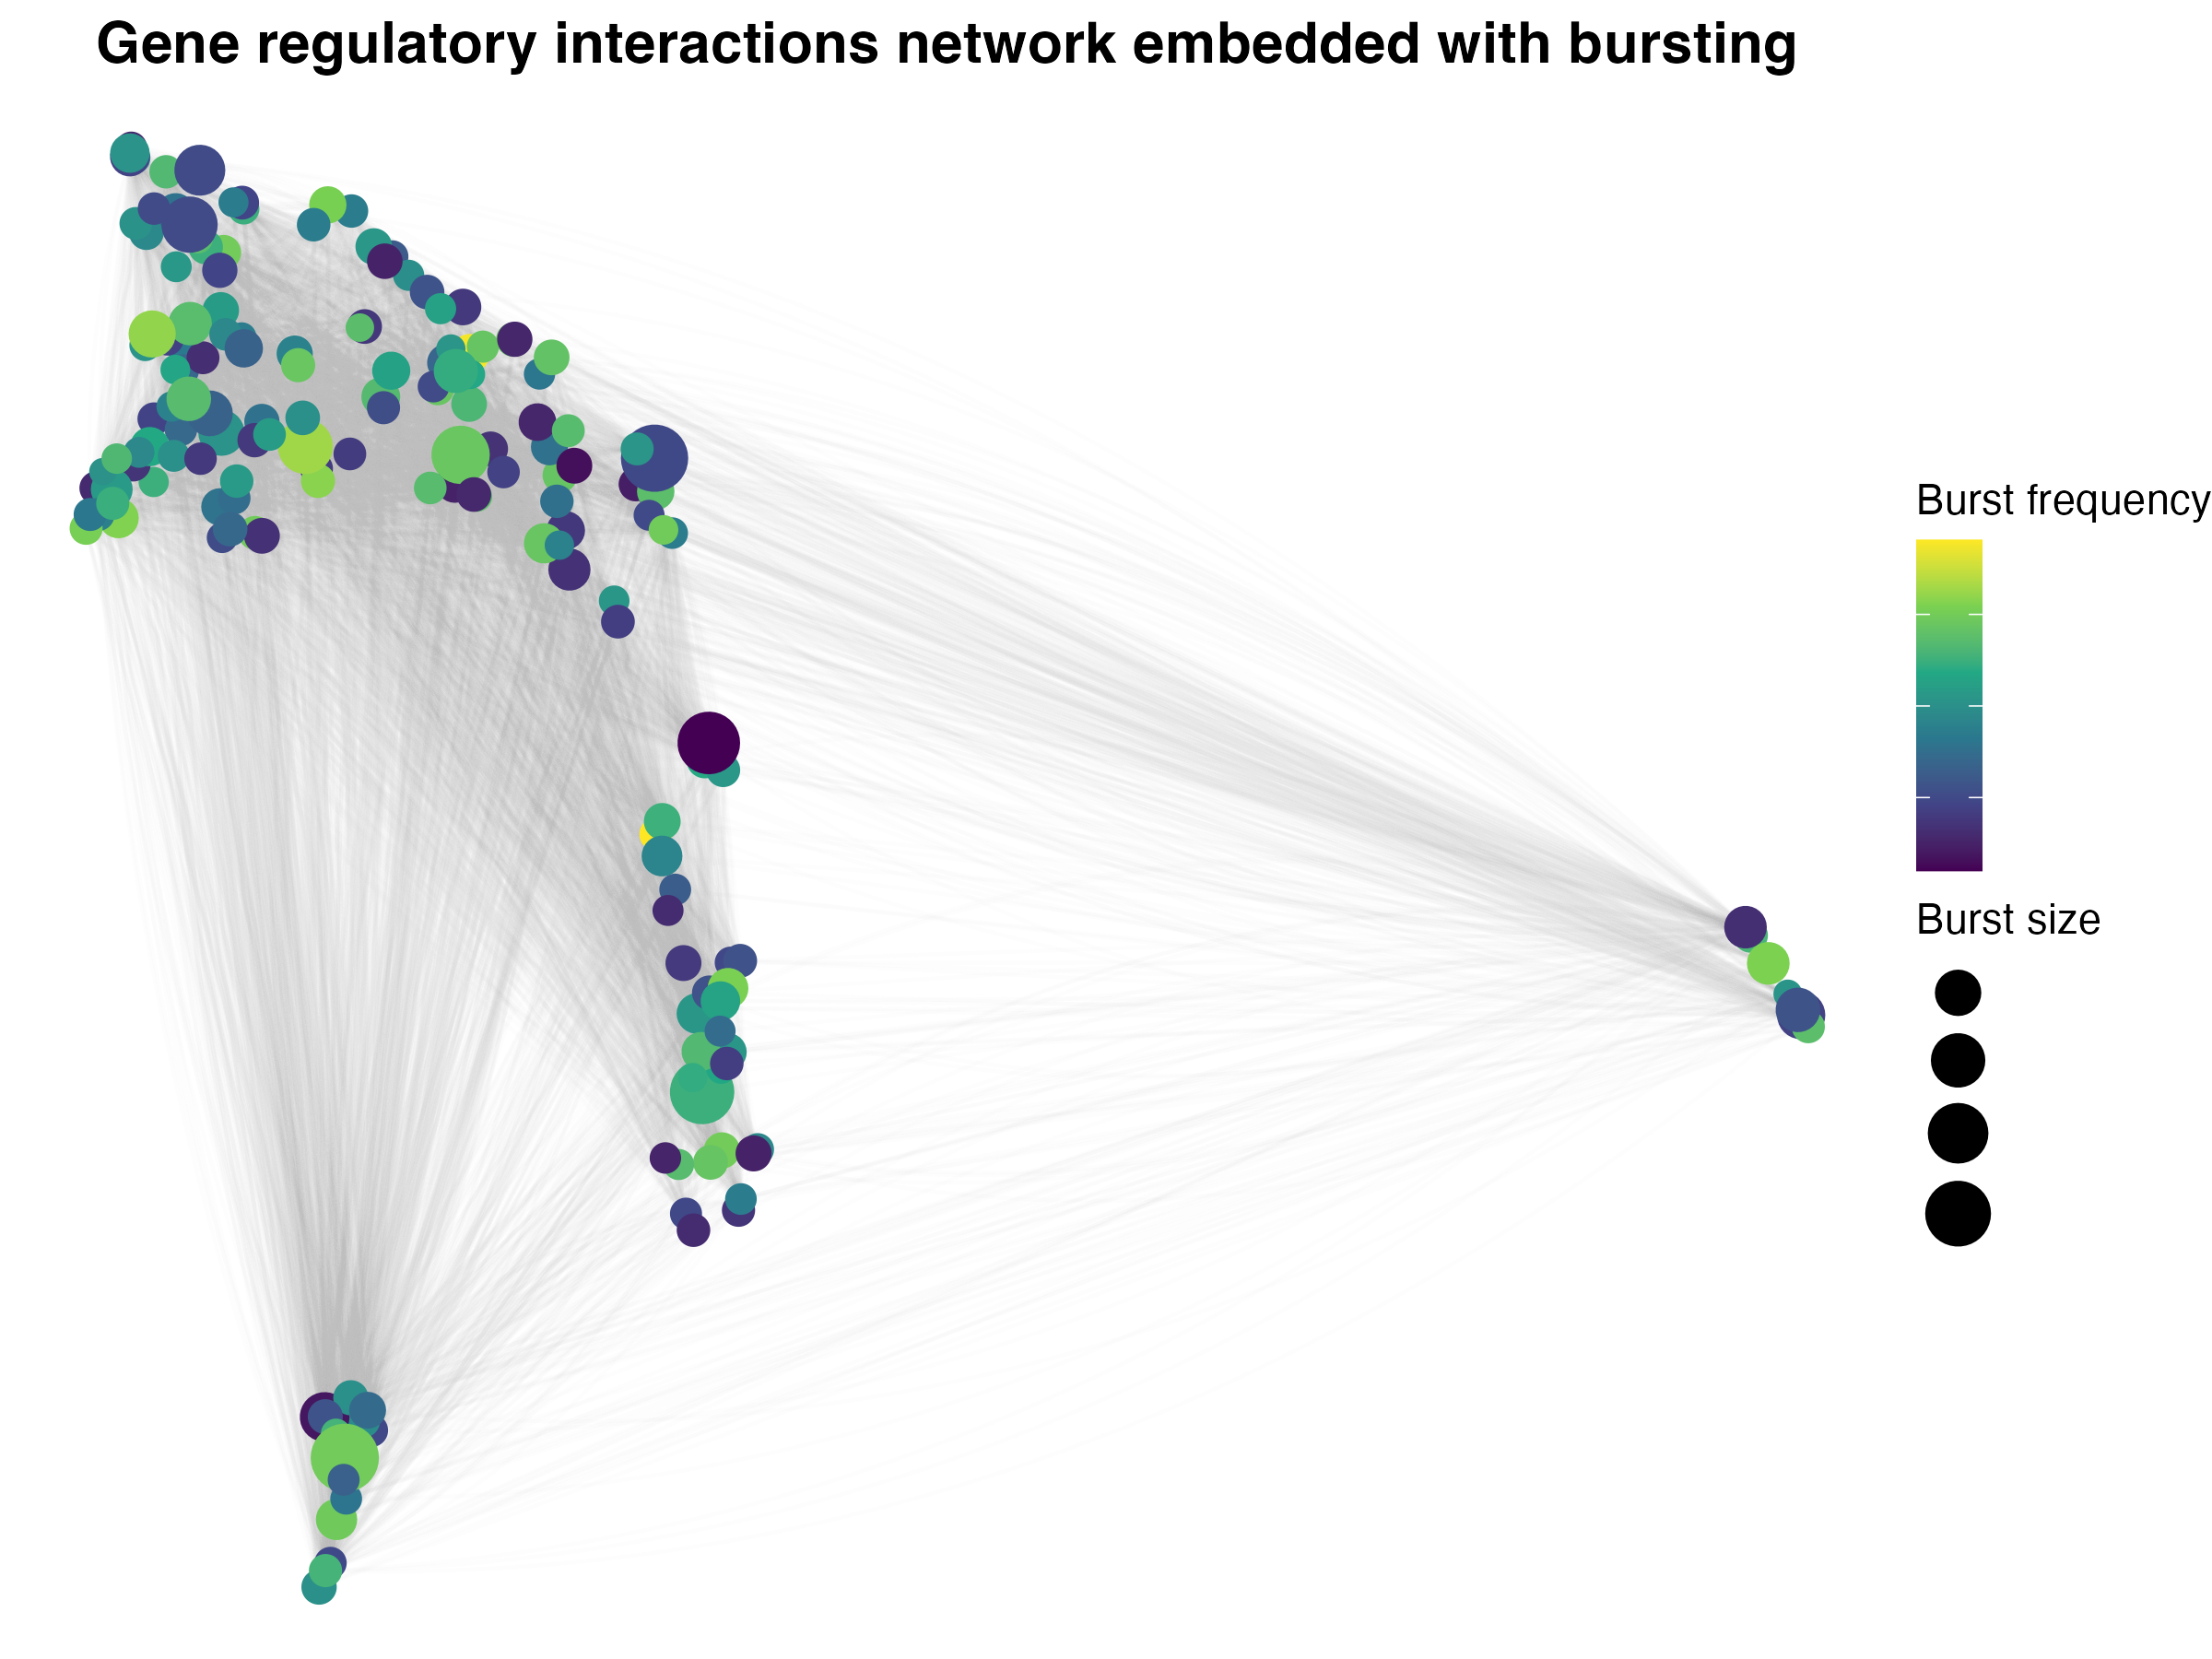

In [4]:
display(Image(filename=os.path.abspath("primary_mouse_data/inference_results/network_plot_DMSO.png"), width=600))

For IdU group:

In [ ]:
counts_file = os.path.abspath("primary_mouse_data/inference_results/network_data_umap_idu.csv")
gene_interactions_file = os.path.abspath("primary_mouse_data/inference_results/network_data_idu.csv")
burst_info_file = os.path.abspath("primary_mouse_data/inference_results/burst_info_idu.csv")
degree_data_file = os.path.abspath("primary_mouse_data/inference_results/degree_data_idu.csv")
network_figure = os.path.abspath("primary_mouse_data/inference_results/network_plot_idu.png") 
bl.plotting._plotting.network_visualization(counts_file, gene_interactions_file, burst_info_file, degree_data_file, network_figure, 2, 0.5)

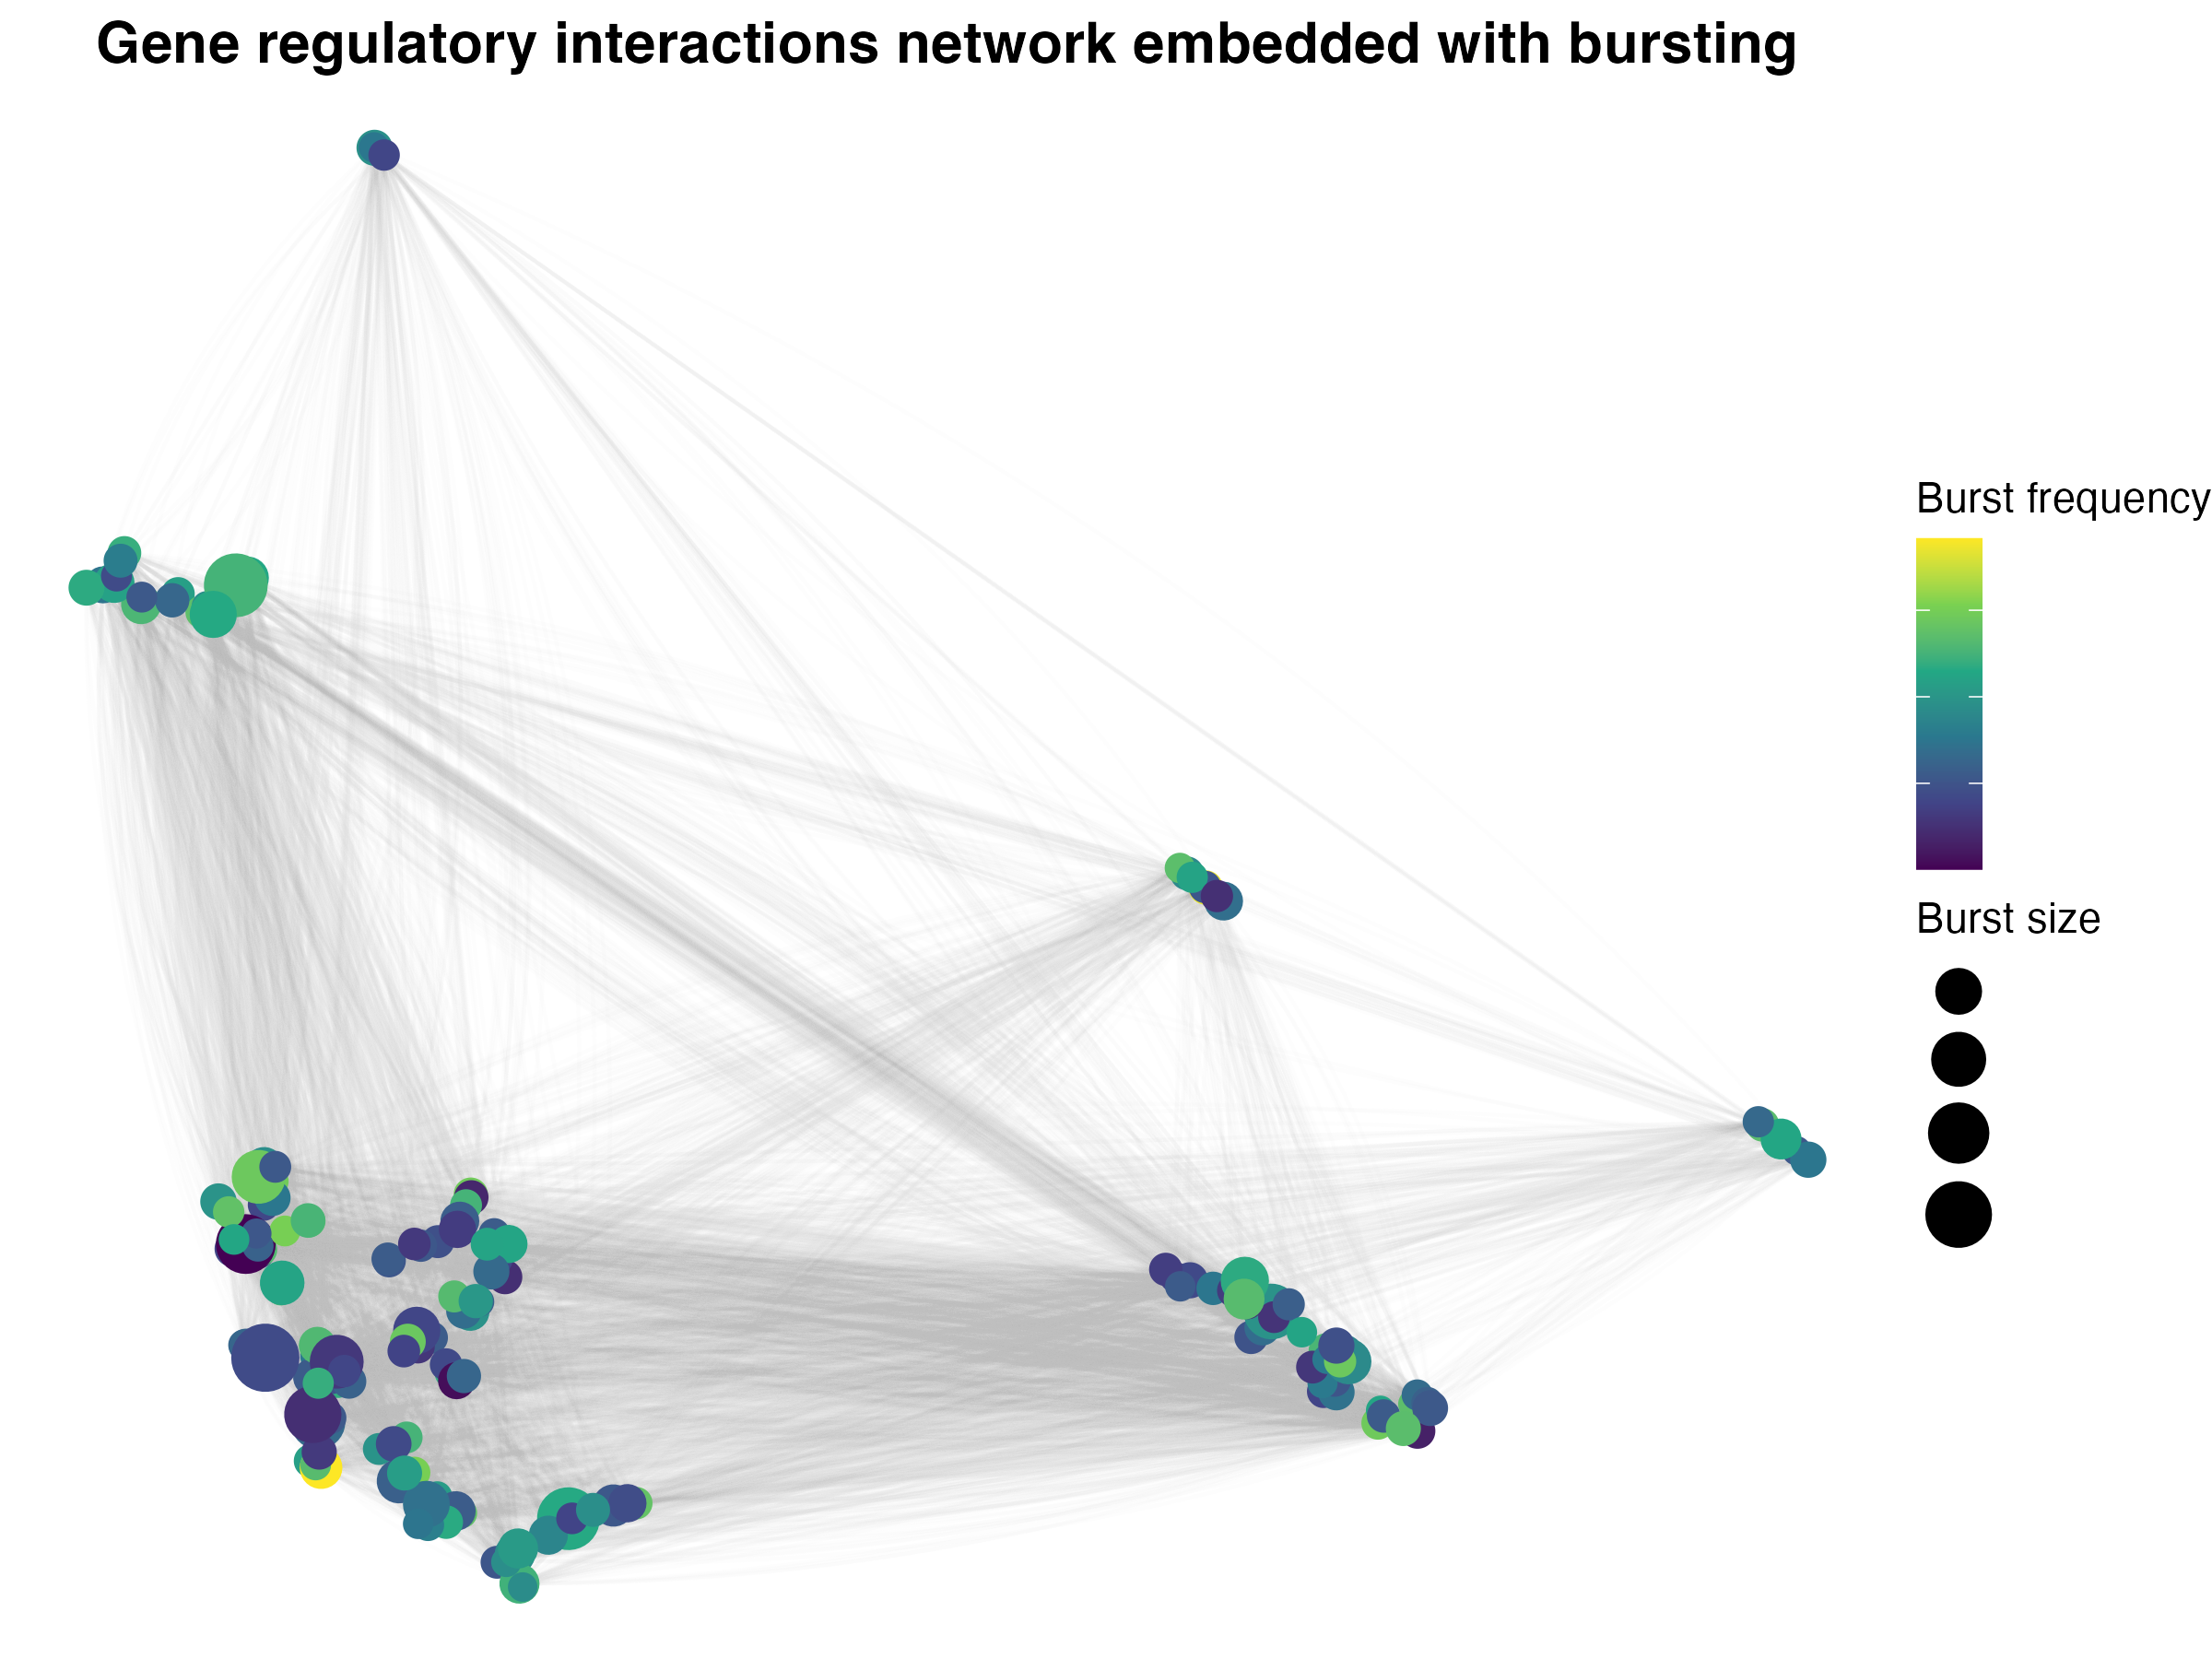

In [ ]:
display(Image(filename=os.path.abspath("primary_mouse_data/inference_results/network_plot_idu.png"), width=600))

##  Comparison analysis

Based on our previously obtained inferences, we perform several comparison analyses of burst kinetics and regulation for two groups.

### Comparison analysis for burst kinetics

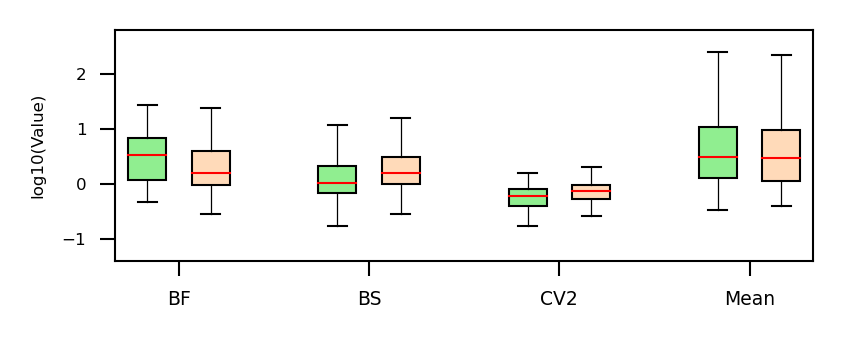

In [3]:
result_unique_idu_DMSO = np.matrix(pd.read_csv(os.path.abspath("primary_mouse_data/inference_results/result_unique_idu_DMSO.csv")))[:, 1::]
p_values = bl.tools._downstream_analysis.comparison_burst_analysis(result_unique_idu_DMSO)

### Comparison analysis for the overall regulatory interactions level

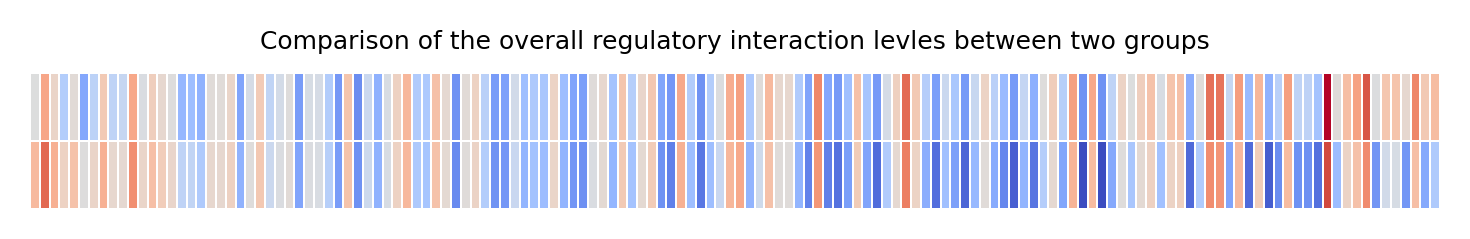

In [3]:
result_unique_idu_DMSO = np.matrix(pd.read_csv(os.path.abspath("primary_mouse_data/inference_results/result_unique_idu_DMSO.csv")))[:, 1::]
genename, sorted_interaction_level, interaction_level = bl.tools._downstream_analysis.comparison_regulation_analysis(result_unique_idu_DMSO)

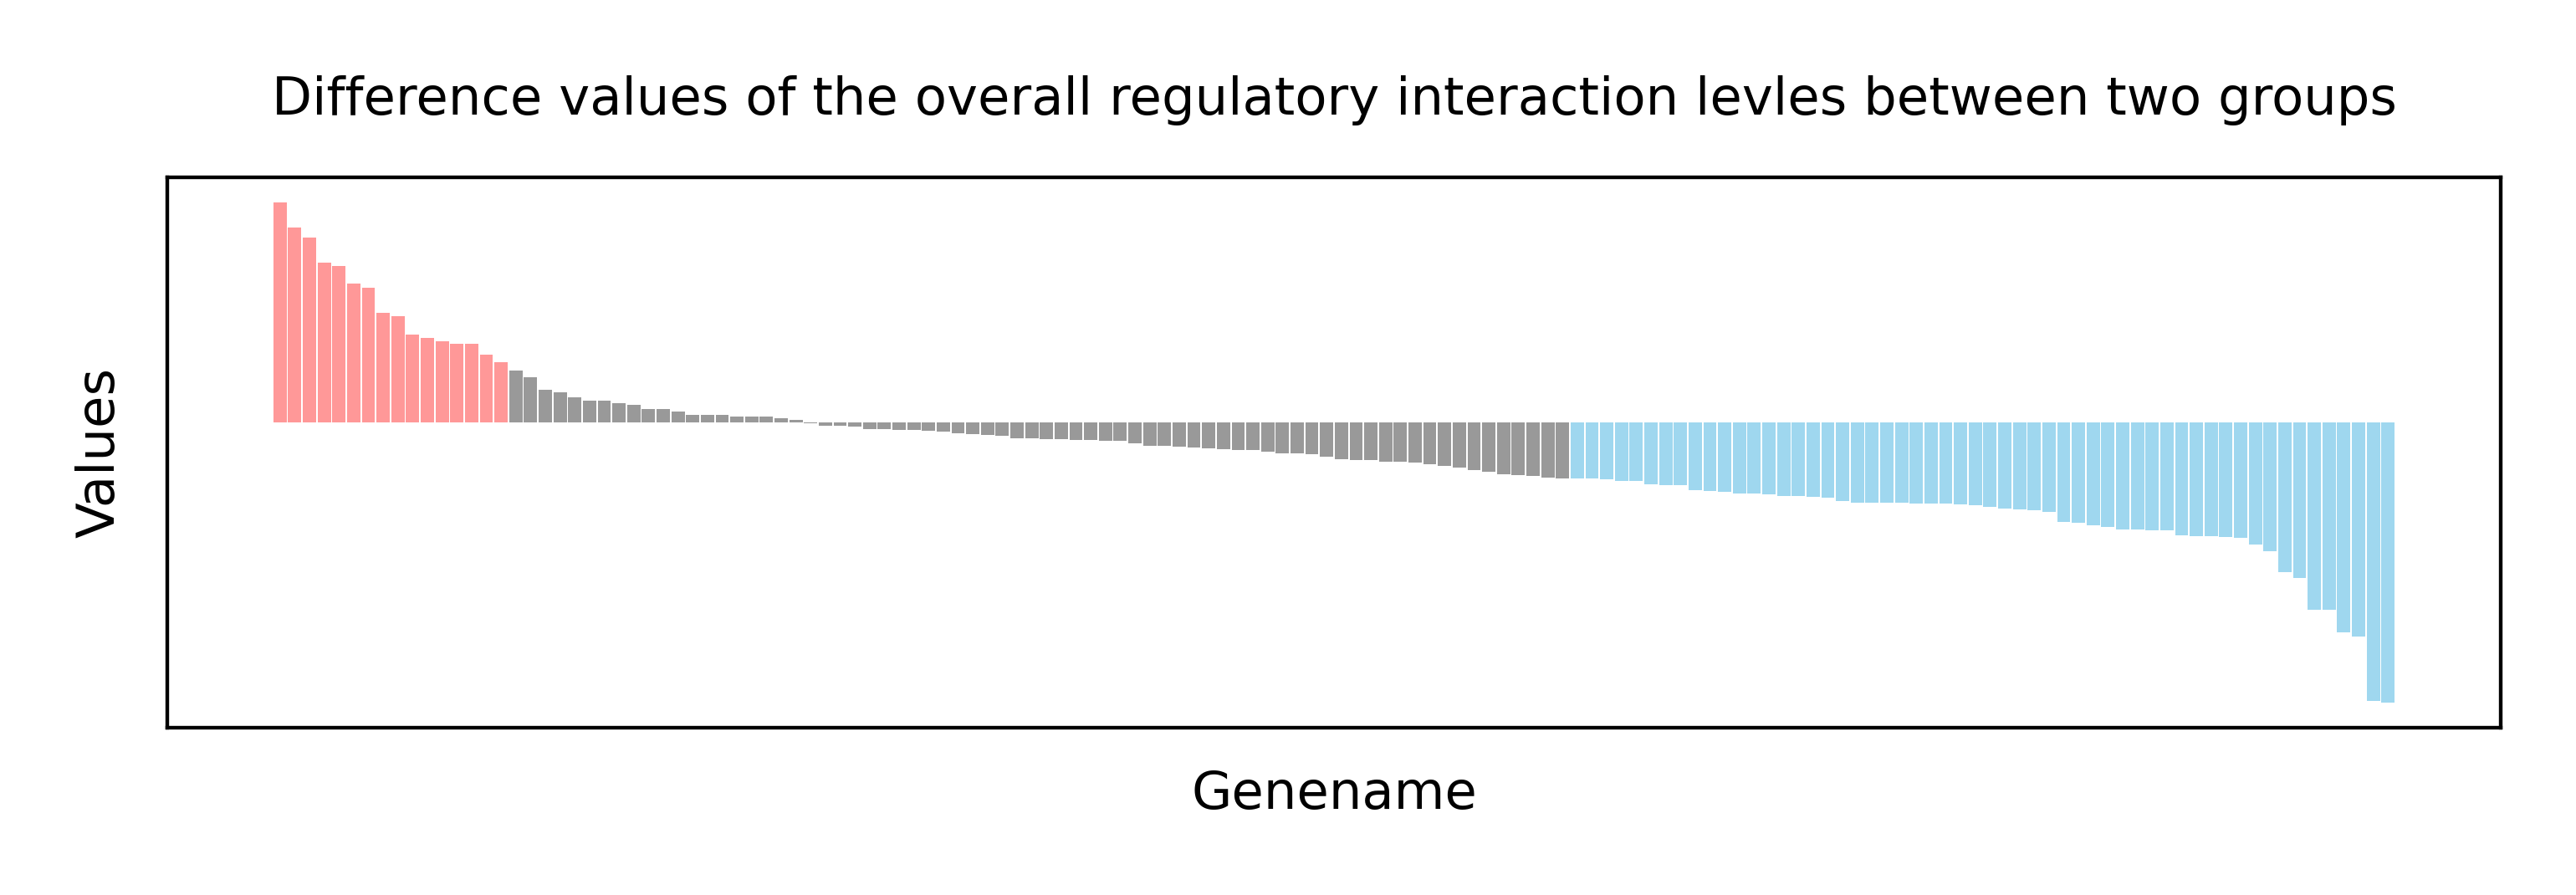

In [4]:
bl.tools._downstream_analysis.comparison_regulation_difference_analysis(sorted_interaction_level)

### GO enrichment analysis for the differential regulated target gene set

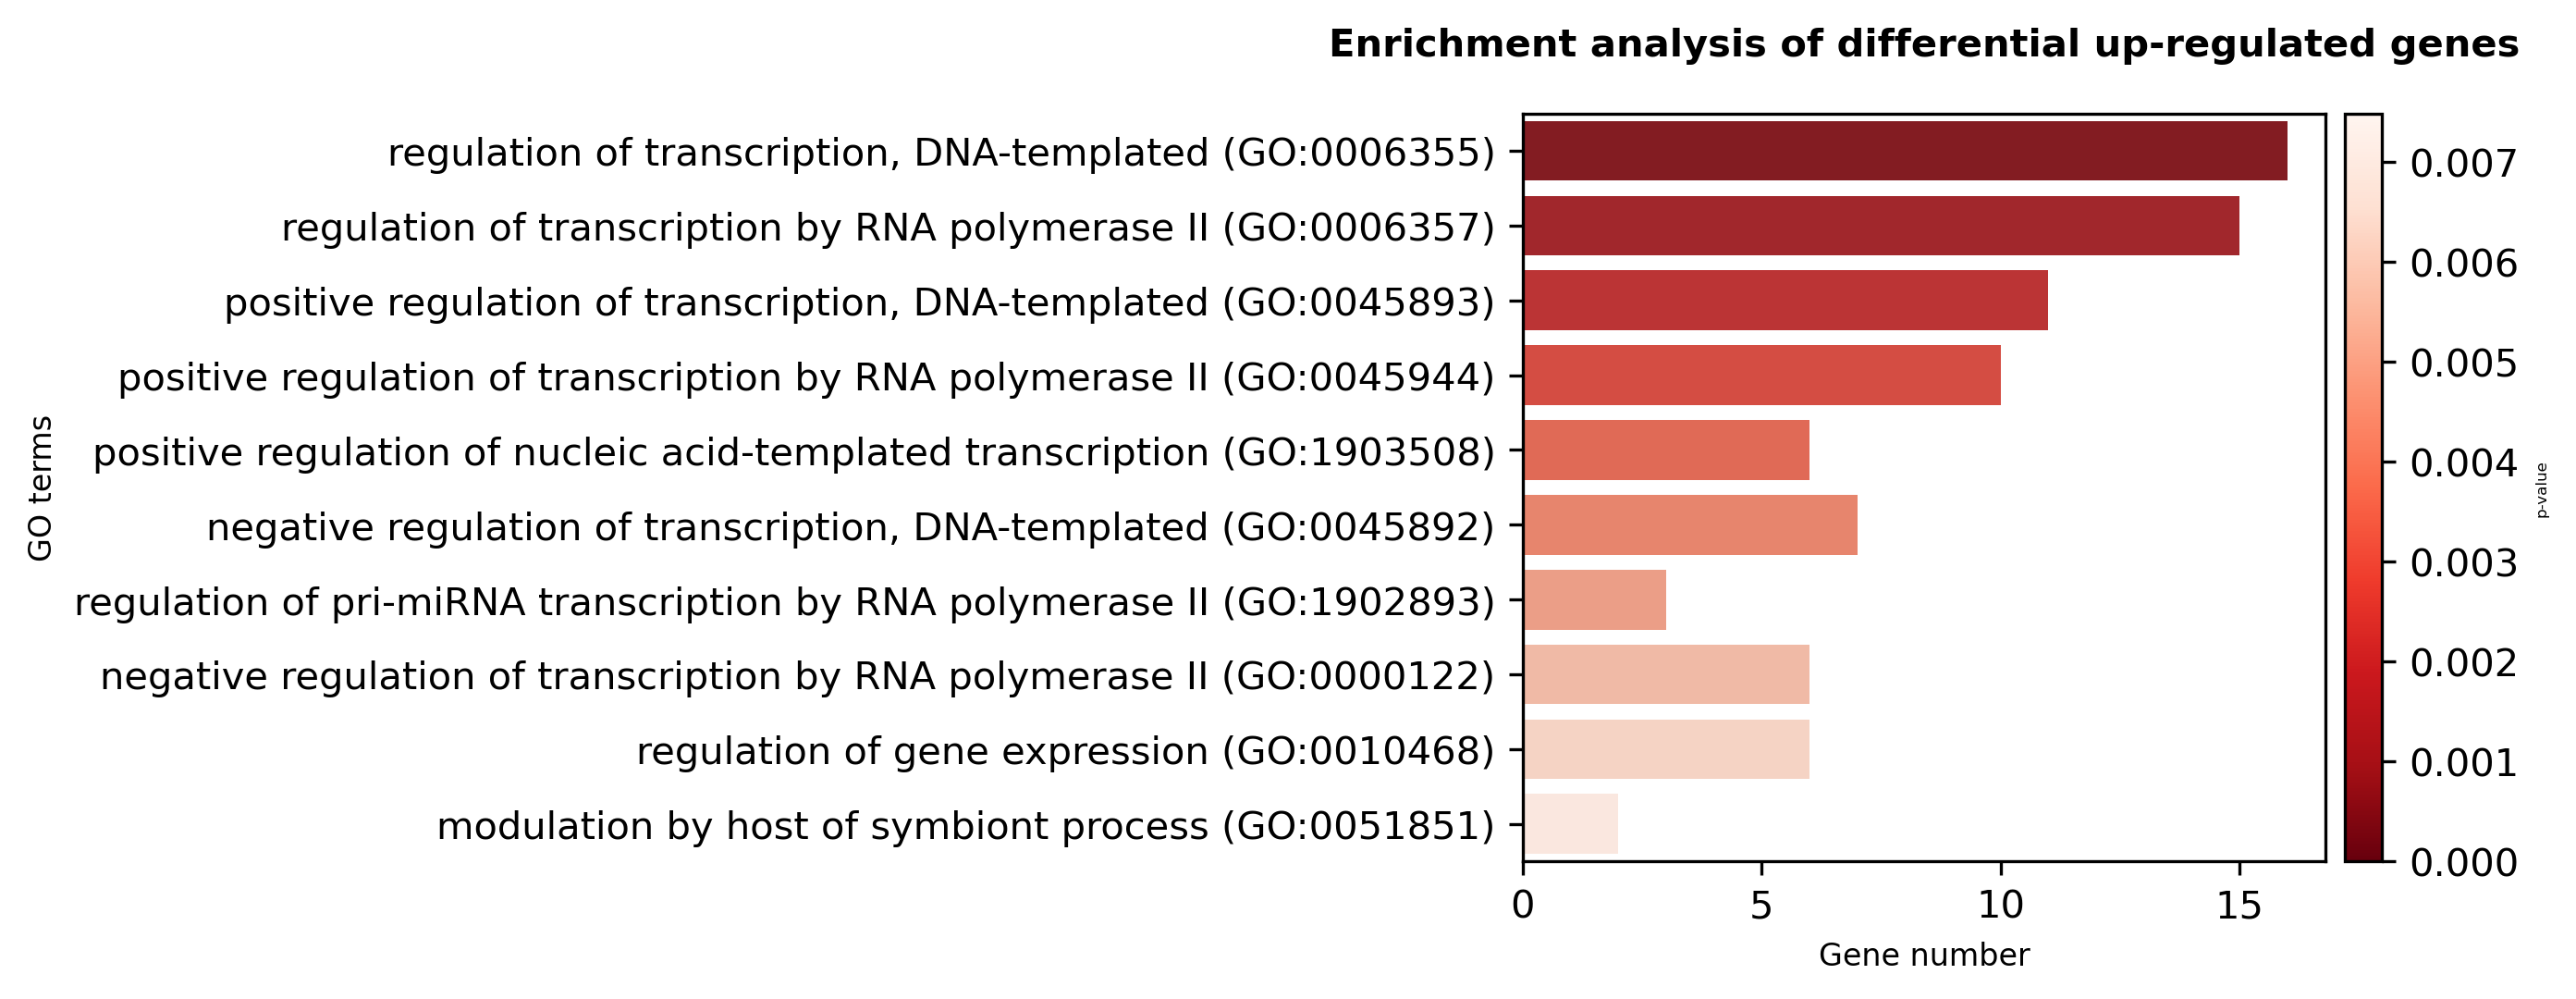

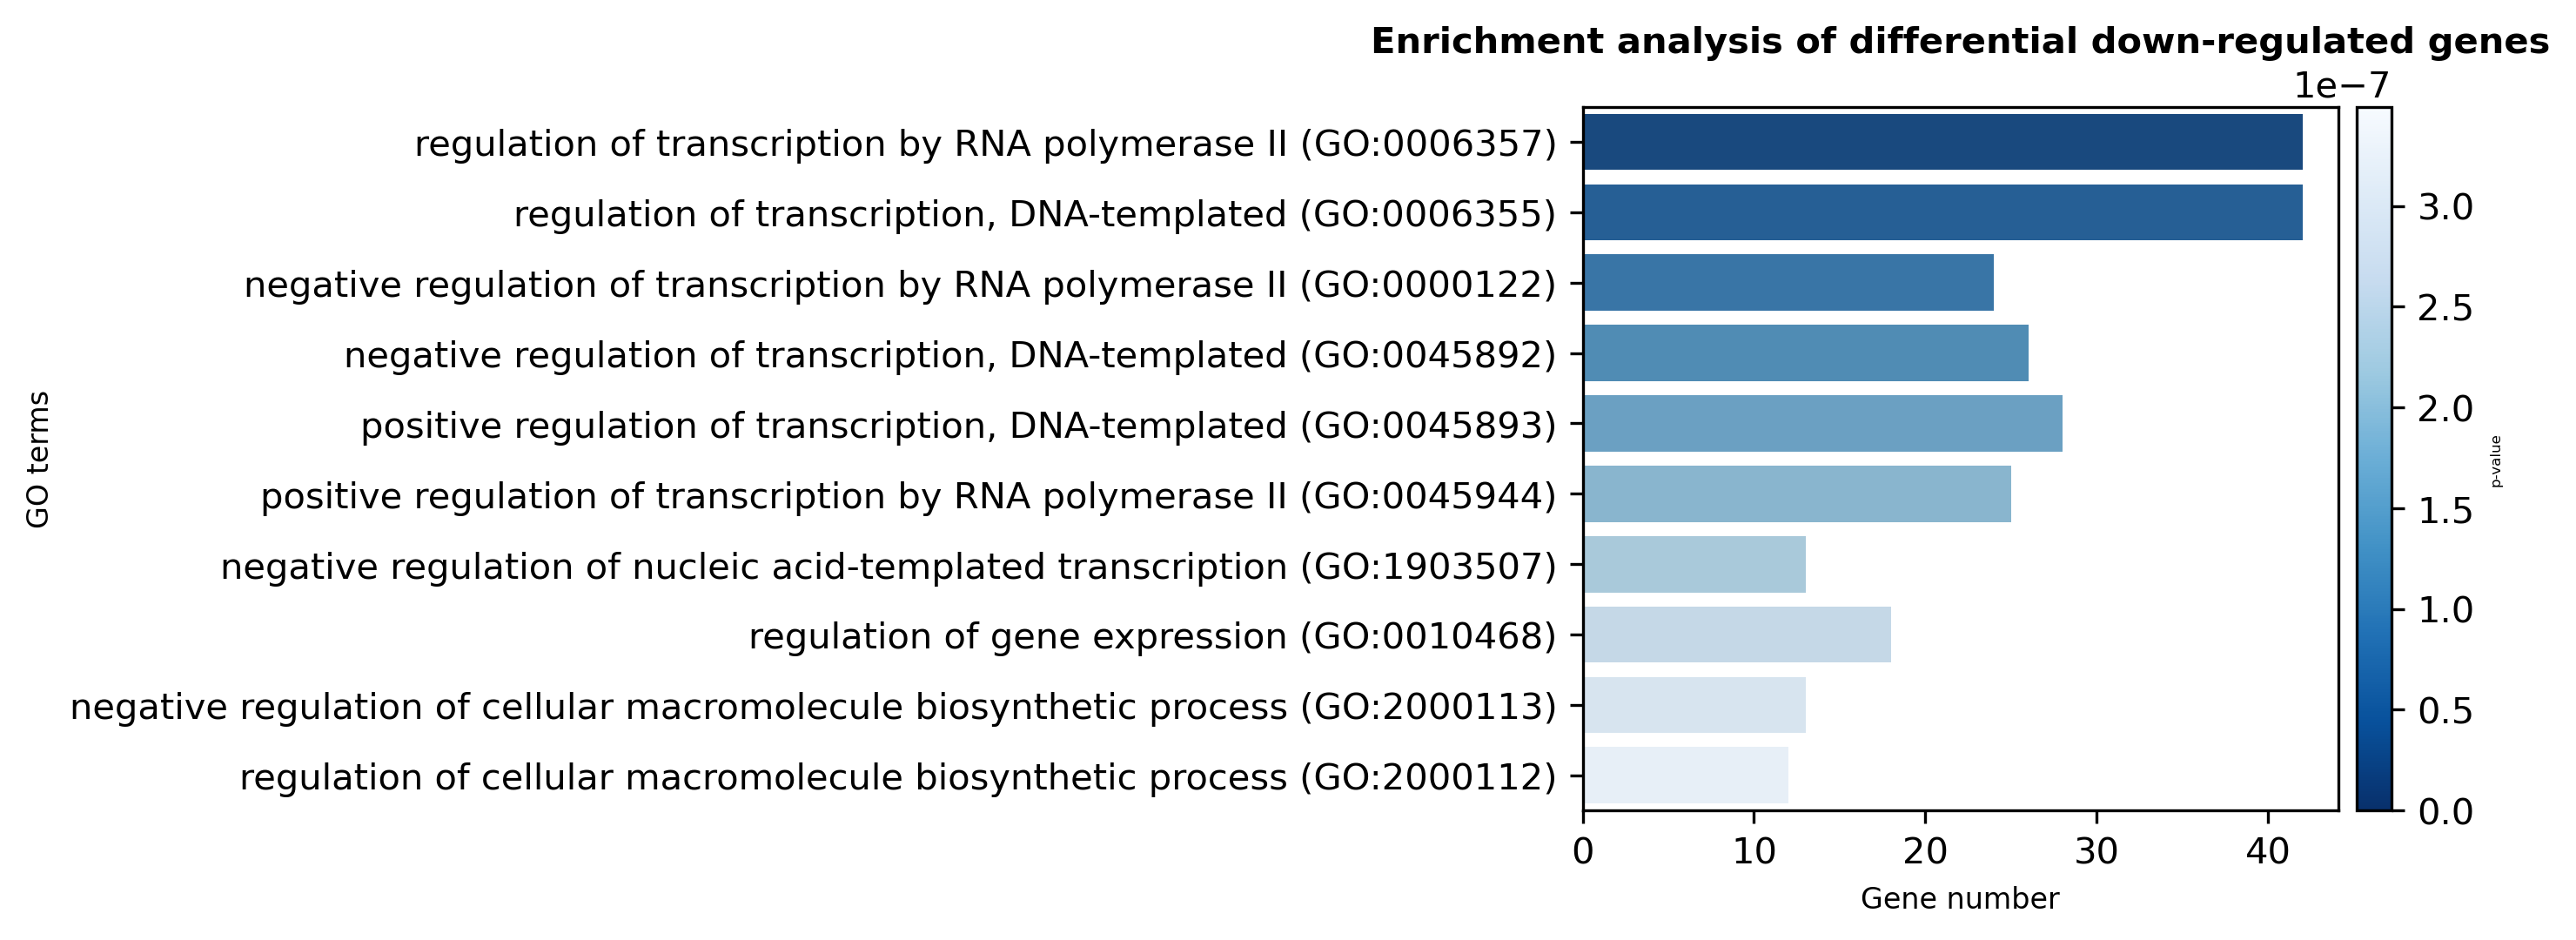

In [5]:
bl.tools._downstream_analysis.differential_tg_GO(genename, interaction_level)